In [1]:
# MO444 2s/2017 - First assignment
#
#         Group 05
#
# - Anderson Rossanez (124136)
# - Bruno Branta Lopes (31470)
#

# Plotting inline instead of opening an outer window.
%matplotlib inline

# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import sqrt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Defines
years = range(1922, 2011)

# Functions
def load_data(filename):
    raw_data = open(filename, 'rt')
    data = np.loadtxt(raw_data, delimiter=",")
    return data

def split_Y_X(dataset):
    Y = dataset[:,0]
    X = dataset[:,1:]
    return Y, X

def get_errors_by_year(model, data_Y, data_X):
    errors = []
    for y in years:
        filt = data_Y == y
        if not sum(filt):
            errors.append(0)
            continue
        errors.append(mean_squared_error(data_Y[filt], lr_normalized_model.predict(data_X[filt])))
    return errors

In [2]:
# load training data
data = load_data('year-prediction-msd-train.txt')

print('Training data size: {}'.format(len(data)))

Training data size: 463715


In [3]:
# Take a look at the data (5 first instances):
# - first column (index 0) is the song release year
# - remaining columns are the the features (indexes 1 - 90)
data_frame = pd.DataFrame(data)
data_frame.head(5)

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2004.0,46.50128,-18.37096,58.89824,27.28181,1.93097,-2.43167,18.64843,-5.62769,-1.47711,...,43.94716,-64.21148,13.04284,156.03785,-2.42670,51.71977,-43.56703,10.63735,24.08962,-21.41886
1,2005.0,41.46015,-52.30140,-4.59825,-19.28084,-11.85844,-19.54192,1.30306,-1.83185,5.98469,...,-13.48435,-154.65715,35.22429,89.53649,-3.13145,-128.28120,89.97277,-15.88139,-75.21074,-0.51139
2,2009.0,42.18667,-85.65863,-7.91506,-11.84193,-12.61959,-21.66749,4.97883,-11.86750,9.87342,...,42.08584,-181.77349,43.00181,87.94977,-13.70362,136.49979,140.32633,11.51422,382.79589,29.98269
3,1987.0,46.90244,19.86314,10.92119,4.87136,-41.17499,-19.84156,2.93308,-5.98711,3.05997,...,-2.76407,-20.31782,-75.24506,125.81801,-15.50828,-63.31002,-142.21937,-12.36699,32.45911,-17.14909
4,2009.0,46.64388,-81.99503,41.62851,3.65855,-9.38201,-13.51749,7.48781,-7.03302,7.06982,...,12.29244,-143.25348,91.15842,-227.85481,7.75916,-41.32376,-225.66526,-4.05081,455.39458,41.65310


In [4]:
# split train data into training/validation (80/20)
train_data, validation_data = train_test_split(data, test_size=0.2)

print('Train data size: {}'.format(len(train_data)))
print('Validation data size: {}'.format(len(validation_data)))

Train data size: 370972
Validation data size: 92743


In [5]:
# load test data
test_data = load_data('year-prediction-msd-test.txt')

print('Test data size: {}'.format(len(test_data)))

Test data size: 36285


In [6]:
# Split label (years) and features
train_data_Y, train_data_X = split_Y_X(train_data)
validation_data_Y, validation_data_X = split_Y_X(validation_data)
test_data_Y, test_data_X = split_Y_X(test_data)

In [7]:
# Create a baseline linear regression model and train it
lr_base_model = LinearRegression(copy_X=True)
lr_base_model.fit(train_data_X, train_data_Y)

print('Number of coefficients: {}'.format(len(lr_base_model.coef_)))
print('Coefficients: {}'.format(lr_base_model.coef_))

Number of coefficients: 90
Coefficients: [  8.75342355e-01  -5.60025891e-02  -4.28635822e-02   2.71413984e-03
  -1.44747559e-02  -2.21756983e-01  -7.06844607e-03  -9.99974381e-02
  -6.70794485e-02   2.20655177e-02  -1.65876643e-01   1.46651021e-04
   4.61241047e-02   3.80739098e-04  -4.33156697e-04   6.43125095e-04
   4.39570215e-04   1.53519982e-03   1.91488255e-03   2.12670042e-03
   7.07395803e-04  -5.13817070e-04   7.56538541e-03   2.47100384e-03
  -3.61972547e-03   4.46420812e-05   1.62842645e-03   4.50354390e-04
   8.32041933e-04  -2.91383335e-04  -1.23463112e-03  -1.44073335e-03
  -5.50226365e-03   2.58467927e-03   1.97297005e-03  -5.29815529e-03
  -2.72535456e-04   6.50778857e-04   1.40805772e-03  -1.76454422e-03
  -2.10874179e-03  -6.72210302e-04  -1.48700319e-03  -2.25130638e-03
  -3.15982795e-03   6.69968350e-03   4.46287110e-04  -2.03554307e-03
   2.64301776e-04   2.04648085e-03   8.85112794e-05  -1.76126179e-03
   1.82257940e-03   6.28605310e-05  -3.54800627e-04   1.500397

In [8]:
# A quick comparison on some instances of the validation data with the predicted values...
print('Actual: {}'.format(validation_data_Y[0:5]))
print('Predicted: {}'.format(lr_base_model.predict(validation_data_X)[0:5]))

Actual: [ 1991.  2008.  2006.  2004.  2000.]
Predicted: [ 1995.17159095  2004.1423268   2001.82894596  2004.17413763  1996.65952211]


In [9]:
# ... and the errors
mean_sq_error_training = mean_squared_error(train_data_Y, lr_base_model.predict(train_data_X))
print('Training mean squared error: {}'.format(mean_sq_error_training))
print('Training root mean squared error: {}'.format(sqrt(mean_sq_error_training)))

mean_sq_error_validation = mean_squared_error(validation_data_Y, lr_base_model.predict(validation_data_X))
print('Validation mean squared error: {}'.format(mean_sq_error_validation))
print('Validation root mean squared error: {}'.format(sqrt(mean_sq_error_validation)))

Training mean squared error: 91.1911526138
Training root mean squared error: 9.54940587753
Validation mean squared error: 91.547197252
Validation root mean squared error: 9.56802995668


In [10]:
# LR-based alternative #1: Data normalization
lr_normalized_model = LinearRegression(copy_X=True, fit_intercept=True, normalize=True)

lr_normalized_model.fit(train_data_X, train_data_Y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [11]:
# Check the model errors
mean_sq_error_training = mean_squared_error(train_data_Y, lr_normalized_model.predict(train_data_X))
print('Training mean squared error: {}'.format(mean_sq_error_training))
print('Training root mean squared error: {}'.format(sqrt(mean_sq_error_training)))

mean_sq_error_validation = mean_squared_error(validation_data_Y, lr_normalized_model.predict(validation_data_X))
print('Validation mean squared error: {}'.format(mean_sq_error_validation))
print('Validation root mean squared error: {}'.format(sqrt(mean_sq_error_validation)))

Training mean squared error: 91.1911526138
Training root mean squared error: 9.54940587753
Validation mean squared error: 91.547197252
Validation root mean squared error: 9.56802995668


In [12]:
errors = get_errors_by_year(lr_normalized_model, validation_data_Y, validation_data_X)

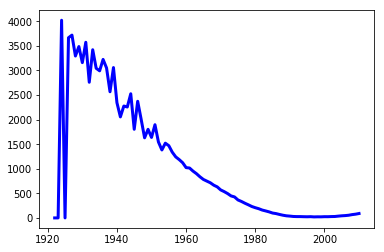

In [13]:
plt.plot(years, errors, color='blue', linewidth=3)
plt.show()

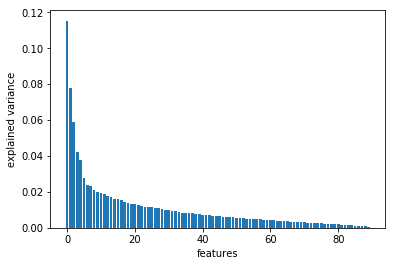

[ 0.11532851  0.0777759   0.05912361  0.04219286  0.03753472  0.02753956
  0.02359554  0.02304793  0.02094471  0.02021415  0.01919546  0.01858921
  0.0179368   0.01691276  0.01625141  0.01585485  0.01524892  0.01420276
  0.01400287  0.01350017  0.01314254  0.01255707  0.01237537  0.01184506
  0.01151359  0.0114388   0.01102866  0.01095432  0.01048148  0.01003775
  0.00983607  0.00940056  0.00923285  0.00892462  0.00842054  0.00819836
  0.00807297  0.00798019  0.00759512  0.00747433  0.00732822  0.00721043
  0.00697242  0.00682276  0.00659506  0.00632909  0.00624344  0.0061423
  0.00595443  0.00584563  0.0056779   0.00554177  0.00536101  0.00517479
  0.00504616  0.00498615  0.00488151  0.00471707  0.00460021  0.00438399
  0.00424625  0.00409944  0.00397833  0.00395161  0.00373126  0.00364653
  0.00350117  0.00336635  0.00326163  0.00316357  0.00304016  0.00293828
  0.00276545  0.00273488  0.00261422  0.002473    0.00228392  0.00216048
  0.00209162  0.00203683  0.00188226  0.00175295  0.

In [14]:
# LR-based alternative #2: Feature reduction

# Standardize the data
std_train_data_X = preprocessing.scale(train_data_X)

# Principal component analysis (PCA)
pca = PCA(n_components=90).fit(std_train_data_X)
plt.bar(range(0, 90), pca.explained_variance_ratio_)
plt.xlabel('features')
plt.ylabel('explained variance')
plt.show()
print(pca.explained_variance_ratio_)

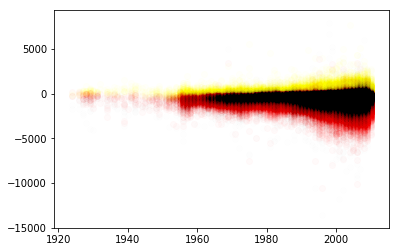

In [48]:
# First three PCA components plotted
transformed_data = pca.transform(validation_data_X)
plt.scatter(validation_data_Y, transformed_data[:,3], color='yellow', alpha=0.02)
plt.scatter(validation_data_Y, transformed_data[:,2], color='red', alpha=0.02)
plt.scatter(validation_data_Y, transformed_data[:,1], color='black', alpha=0.005)
plt.show()

In [73]:
for n_components in range(0, 91, 10):
    n_components = n_components or 1
    transformed_train_data_X = pca.transform(train_data_X)[:,range(0, n_components)]

    lr_pca_model = LinearRegression(copy_X=True)
    lr_pca_model.fit(transformed_train_data_X, train_data_Y)

    mean_sq_error_training = mean_squared_error(train_data_Y, lr_pca_model.predict(transformed_train_data_X))
    
    transformed_validation_data_X = pca.transform(validation_data_X)[:,range(0, n_components)]
    mean_sq_error_validation = mean_squared_error(validation_data_Y, lr_pca_model.predict(transformed_validation_data_X))

    print '%2d PCA components used: %5.2f %5.2f' % (n_components, sqrt(mean_sq_error_training), sqrt(mean_sq_error_validation))


 1 PCA components used: 10.93 10.97
10 PCA components used: 10.65 10.69
20 PCA components used: 10.57 10.61
30 PCA components used: 10.44 10.47
40 PCA components used: 10.39 10.42
50 PCA components used: 10.29 10.31
60 PCA components used: 10.24 10.25
70 PCA components used: 10.20 10.21
80 PCA components used:  9.97  9.98
90 PCA components used:  9.55  9.57
